# Hypothesis Testing

## Methodology
The chosen statistical testing for this analysis is ANOVA (Analysis of Variance) due to the purpose of this analysis which is to compare the gross income of each store branch.

ANOVA is chosen because we have multiple categories of a categorical variable and a continuous variable.

Asymmetrical distributions like the F and chi-square distributions have only one tail. This means that analyses such as ANOVA and chi-square tests do not have a “one-tailed vs. two-tailed” option, because the distributions they are based on have only one tail.

## Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px

## Data Loading

In [2]:
data = pd.read_csv('supermarket_sales_Dataclean.csv')
data.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Category,Unit Price,Quantity,Total,Date,Hour,Payment,COGS,GMP,Gross Income,Rating,Hour Range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,12 ~ 14
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,9 ~ 11
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,12 ~ 14
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,18 ~ 20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,9 ~ 11


In [3]:
data1 = data[["City", "Gross Income"]]
data1

,City,Gross Income
0,Yangon,26.1415
1,Naypyitaw,3.8200
2,Yangon,16.2155
3,Yangon,23.2880
4,Yangon,30.2085
...,...,...
995,Naypyitaw,2.0175
996,Mandalay,48.6900
997,Yangon,1.5920
998,Yangon,3.2910


### Hypothesis
α = 0.05

H0: There are no significant differences between the average gross income amongst 3 store branches. <br>
H1: There are significant differences between the average gross income of 3 branches.

### Analysis

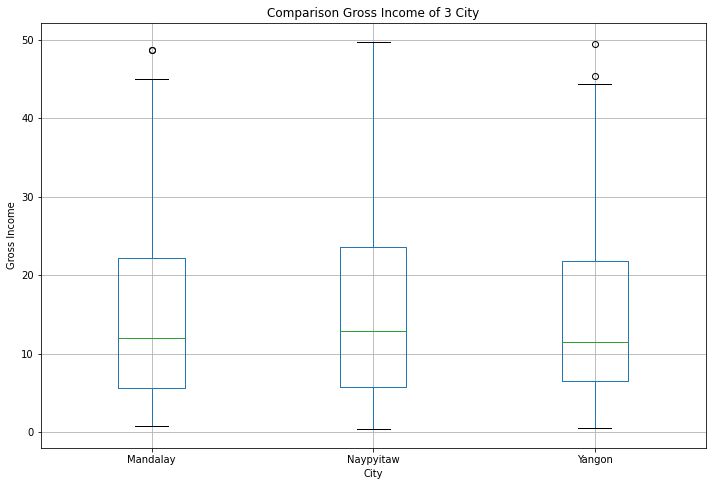

In [4]:
ax = data1.boxplot(by="City", column="Gross Income", figsize=(10, 7))
ax.set_xlabel("City")
ax.set_ylabel("Gross Income")
plt.suptitle('')
plt.title('Comparison Gross Income of 3 City')

plt.tight_layout()
plt.show()

In [5]:
data.groupby('Date').sum()
data.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Category,Unit Price,Quantity,Total,Date,Hour,Payment,COGS,GMP,Gross Income,Rating,Hour Range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,12 ~ 14
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,9 ~ 11
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,12 ~ 14
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,18 ~ 20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,9 ~ 11


In [6]:
Yangon_grossincome = data[data.City == 'Yangon'].groupby('Date').sum()['Gross Income']
Naypyitaw_grossincome = data[data.City == 'Naypyitaw'].groupby('Date').sum()['Gross Income']
Mandalay_grossincome = data[data.City == 'Mandalay'].groupby('Date').sum()['Gross Income']

print("Gross Income Average of Yangon",Yangon_grossincome.mean())
print("Gross Income Average of Naypyitaw",Naypyitaw_grossincome.mean())
print("Gross Income Average of Mandalay",Mandalay_grossincome.mean())

Gross Income Average of Yangon 56.82202808988763
Gross Income Average of Naypyitaw 59.83155113636363
Gross Income Average of Mandalay 58.8026976744186


Based on the average value of gross income for each city, there is a small gap, but can this be said to be insignificant? Let's check through p-value calculations.

In [7]:
f_stat,p_value = stats.f_oneway(Yangon_grossincome, Naypyitaw_grossincome, Mandalay_grossincome)
print('P-value:',p_value)
print('F-Status:', f_stat)


P-value: 0.867487447683447
F-Status: 0.1422319875440749


### Conclusion
The P-Value based on the calcualtion is 0.867487447683447, this value is bigger than 0.05. Then we can conclude that the difference of gross income from Yangon,Naypyitaw and Mandalay is statistically not significant.
Which means, H0 is accepted and H1 is rejected